# **DEVELOPING A PREDICTIVE MODEL FOR TRAFFIC CRASH CAUSE PREDICTION**

---

## **1. Business Understanding**

### 1.1 Business Overview
Traffic crashes remain a significant public safety challenge, causing numerous fatalities, injuries, and economic losses annually. While vast amounts of data on traffic accidents are collected by authorities, there is a gap in tools that not only predict traffic crash outcomes but also explain the underlying causes. This project aims to leverage machine learning techniques to predict the primary contributory cause of traffic crashes based on vehicle characteristics, roadway conditions, and environmental factors.

By using both interpretable (white-box) and complex (black-box) machine learning models, this project balances predictive performance with transparency. The insights generated will help transportation authorities, safety organizations, and urban planners to prioritize interventions, improve road safety policies, and allocate resources effectively to reduce traffic-related incidents.

---

### 1.2 Problem Statement
Transportation agencies typically rely on manual reporting and descriptive statistics to understand the causes of traffic crashes. However, these methods often fail to capture the complex interactions among various factors such as driver behavior, vehicle characteristics, and environmental conditions. This limitation hinders the ability to design effective safety interventions and policies.

This project seeks to bridge this gap by developing machine learning models capable of predicting traffic crash causes with high accuracy while maintaining interpretability. By comparing both white-box and black-box models, the project will provide transparent and actionable insights that can be used to guide traffic safety measures, infrastructure development, and policy decision-making.

---

### 1.3 Business Objective

#### 1.3.1 Main Objective
To develop a machine learning model that can accurately predict the primary contributory cause of traffic crashes while ensuring that the model’s predictions are interpretable for decision-makers.

#### 1.3.2 Specific Objectives
The specific objectives of the project are:

1. **Predict the Primary Crash Causes:**  
   Develop and evaluate supervised machine learning models to classify traffic crashes based on their primary contributory causes.

2. **Ensure Model Interpretability:**  
   Apply interpretable modeling techniques to provide transparent insights into the factors driving the model’s predictions.

3. **Identify Key Risk Factors:**  
   Analyze and identify the most significant risk factors associated with traffic crashes, including vehicle, roadway, and environmental features.

4. **Evaluate Performance vs. Interpretability:**  
   Compare white-box and black-box models to evaluate the trade-offs between model accuracy and interpretability.

5. **Support Safety Interventions:**  
   Provide actionable insights that can inform traffic safety policies, infrastructure design, and targeted enforcement strategies.

---

### 1.4 Research Questions

1. What features are most predictive of traffic crash causes based on vehicle, roadway, and environmental factors?
2. How can machine learning models be used to predict the primary contributory cause of a traffic crash?
3. What are the trade-offs between predictive accuracy and model interpretability in predicting crash causes?
4. How can white-box models (e.g., Decision Trees) and black-box models (e.g., XGBoost) be compared to assess model performance and explainability?
5. What are the key risk factors influencing traffic crashes, and how can they inform safety interventions?
6. How can machine learning models be applied to predict crash causes across different locations and time periods?

---

### 1.5 Success Criteria

The success of this project will be assessed based on the following criteria:

1. **Predictive Performance:**  
   Achieve a **macro F1 score** of at least **0.50**, demonstrating the model’s ability to predict all traffic crash causes with balanced performance across all categories.

2. **Model Interpretability:**  
   Ensure that the model’s predictions can be easily explained using interpretability techniques, such as feature importance, making the results understandable to non-technical stakeholders.

3. **Actionable Insights:**  
   Provide actionable insights from the model’s findings, identifying key risk factors associated with different traffic crash causes, and suggesting data-driven safety interventions.

4. **Trade-off Evaluation:**  
   Compare the performance of white-box and black-box models and evaluate the trade-offs between **predictive accuracy** and **interpretability**, ensuring that the chosen model balances both aspects effectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Traffic_Crashes.csv")
df.head()

<ipython-input-2-e28242deb84c>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes.csv")


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,97f1975e8f3e9a1b53ae1abfb6982a374074d8649d9e97...,NaN,01/28/2026 10:56:00 PM,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,4,1,41.713829,-87.551093,POINT (-87.551093105845 41.713829100033)
1,1a00190102664f10ee5c2ee8767d45c331991692f12dfc...,NaN,01/28/2026 10:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.796711,-87.755202,POINT (-87.755202215729 41.796710893317)
2,a4fc7133c8193ec53288a9acec055321dee47515621012...,Y,01/28/2026 10:10:00 PM,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,...,0.0,0.0,2.0,0.0,22,4,1,41.813005,-87.603823,POINT (-87.603822899265 41.813004951227)
3,e79f2db27a528710d42b2eb1991876b7a9bf029aee3685...,NaN,01/28/2026 10:10:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,22,4,1,41.868335,-87.705668,POINT (-87.705668192505 41.868335288795)
4,48040347f534c316e38421a60b65ab7017ae47cb4a0c3c...,NaN,01/28/2026 10:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.866618,-87.696128,POINT (-87.696128029764 41.866617682133)


In [3]:
df.shape

(1024029, 48)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024029 entries, 0 to 1024028
Data columns (total 48 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID                1024029 non-null  object 
 1   CRASH_DATE_EST_I               74318 non-null    object 
 2   CRASH_DATE                     1024029 non-null  object 
 3   POSTED_SPEED_LIMIT             1024029 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         1024029 non-null  object 
 5   DEVICE_CONDITION               1024029 non-null  object 
 6   WEATHER_CONDITION              1024029 non-null  object 
 7   LIGHTING_CONDITION             1024029 non-null  object 
 8   FIRST_CRASH_TYPE               1024029 non-null  object 
 9   TRAFFICWAY_TYPE                1024029 non-null  object 
 10  LANE_CNT                       199035 non-null   object 
 11  ALIGNMENT                      1024029 non-null  object 
 12  ROADWAY_SURFAC

In [5]:
df_clean = pd.read_csv("cleaned_traffic_crashes.csv")
df_clean.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,location
0,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,22,4,1,POINT (-87.551093105845 41.713829100033)
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.755202215729 41.796710893317)
2,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,OTHER,UNKNOWN,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.603822899265 41.813004951227)
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,3.0,0.0,22,4,1,POINT (-87.705668192505 41.868335288795)
4,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.696128029764 41.866617682133)


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024029 entries, 0 to 1024028
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   posted_speed_limit             1024029 non-null  int64  
 1   traffic_control_device         1024029 non-null  object 
 2   device_condition               1024029 non-null  object 
 3   weather_condition              1024029 non-null  object 
 4   lighting_condition             1024029 non-null  object 
 5   first_crash_type               1024029 non-null  object 
 6   trafficway_type                1024029 non-null  object 
 7   alignment                      1024029 non-null  object 
 8   roadway_surface_cond           1024029 non-null  object 
 9   road_defect                    1024029 non-null  object 
 10  report_type                    1024029 non-null  object 
 11  crash_type                     1024029 non-null  object 
 12  damage        

In [7]:
df_clean.isna().sum()

posted_speed_limit               0
traffic_control_device           0
device_condition                 0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
report_type                      0
crash_type                       0
damage                           0
date_police_notified             0
prim_contributory_cause          0
sec_contributory_cause           0
street_no                        0
street_direction                 0
street_name                      0
beat_of_occurrence               0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
injuries_unknown    

In [8]:
df_clean.duplicated().value_counts()

False    1023967
True          62
Name: count, dtype: int64

In [9]:
df_clean = df_clean.drop_duplicates()
df_clean.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,location
0,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,22,4,1,POINT (-87.551093105845 41.713829100033)
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.755202215729 41.796710893317)
2,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,OTHER,UNKNOWN,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.603822899265 41.813004951227)
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,3.0,0.0,22,4,1,POINT (-87.705668192505 41.868335288795)
4,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.696128029764 41.866617682133)


In [10]:
df_clean.duplicated().value_counts()

False    1023967
Name: count, dtype: int64

In [11]:
df_clean.columns

Index(['posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
       'report_type', 'crash_type', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'location'],
      dtype='object')

In [12]:
columns_to_drop = ['date_police_notified', 'street_name', 'location', 'sec_contributory_cause', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown']
df_clean = df_clean.drop(columns=columns_to_drop)

In [13]:
df_clean['prim_contributory_cause'].head(10)


0             UNABLE TO DETERMINE
1             UNABLE TO DETERMINE
2             UNABLE TO DETERMINE
3     IMPROPER OVERTAKING/PASSING
4             IMPROPER LANE USAGE
5             UNABLE TO DETERMINE
6    DISREGARDING TRAFFIC SIGNALS
7                IMPROPER BACKING
8             UNABLE TO DETERMINE
9           FOLLOWING TOO CLOSELY
Name: prim_contributory_cause, dtype: object

In [14]:
cause_mapping = {
    # Treat undetermined as missing so we can drop those rows
    'UNABLE TO DETERMINE': np.nan,

    # Driver Error
    'FAILED TO REDUCE SPEED TO AVOID CRASH': 'Driver Error',
    'IMPROPER OVERTAKING/PASSING': 'Driver Error',
    'FOLLOWING TOO CLOSELY': 'Driver Error',
    'FAILING TO YIELD RIGHT-OF-WAY': 'Driver Error',
    'DISREGARDING TRAFFIC SIGNALS': 'Driver Error',
    'DISREGARDING STOP SIGN': 'Driver Error',
    'IMPROPER LANE USAGE': 'Driver Error',
    'IMPROPER TURNING/NO SIGNAL': 'Driver Error',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Error',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Driver Error',
    'IMPROPER BACKING': 'Driver Error',
    'DISTRACTION - FROM INSIDE VEHICLE': 'Driver Error',

    # Non-Driver Technical (merge External + Vehicle Defect)
    'WEATHER': 'Non-Driver Technical',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Non-Driver Technical',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Non-Driver Technical',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Non-Driver Technical',
    'EQUIPMENT - VEHICLE CONDITION': 'Non-Driver Technical',

    # Other
    'OTHER': 'Other'
}


In [15]:
df_clean['Crash_Cause'] = df_clean['prim_contributory_cause'].map(cause_mapping)

# Convert unmapped known causes to 'Other' FIRST
df_clean['Crash_Cause'] = df_clean['Crash_Cause'].fillna('Other')

# Now drop only the undetermined ones (which we set to NaN explicitly)
df_clean = df_clean[df_clean['prim_contributory_cause'] != 'UNABLE TO DETERMINE']

# Drop original
df_clean = df_clean.drop(columns=['prim_contributory_cause'])

df_clean['Crash_Cause'].value_counts()


Crash_Cause
Driver Error            447775
Other                   139539
Non-Driver Technical     33686
Name: count, dtype: int64

In [16]:
X = df_clean.drop(['Crash_Cause', 'prim_contributory_cause'], axis=1, errors='ignore')
y = df_clean['Crash_Cause']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((465750, 20), (155250, 20))

In [18]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(exclude=['object']).columns


In [19]:
print("Categorical columns and unique counts:")
cat_cols = X_train.select_dtypes('object').columns
for col in cat_cols:
    print(f"  {col:25} → {X_train[col].nunique()} categories")

Categorical columns and unique counts:
  traffic_control_device    → 19 categories
  device_condition          → 8 categories
  weather_condition         → 12 categories
  lighting_condition        → 6 categories
  first_crash_type          → 18 categories
  trafficway_type           → 20 categories
  alignment                 → 6 categories
  roadway_surface_cond      → 7 categories
  road_defect               → 7 categories
  report_type               → 3 categories
  crash_type                → 2 categories
  damage                    → 3 categories
  street_direction          → 4 categories


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score
)

from sklearn.inspection import permutation_importance


In [21]:


categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # handles missing values
    ("ohe", OneHotEncoder(handle_unknown="ignore",
    min_frequency=200)) # encoding categories
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [22]:
# Model Pipeline
tree_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),  # Your preprocessing steps
    ("model", RandomForestClassifier(
        n_estimators=50,           # Reduce number of trees for faster training
        max_depth=5,              # Limit tree depth to prevent overfitting
        class_weight="balanced",   # Handle class imbalance
        random_state=42,
        n_jobs=-1,                 # Parallelize across all CPU cores
        warm_start=True            # Enables faster re-training with more trees
    ))
])


In [23]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),  
    ("model", LogisticRegression(
        solver="lbfgs",            
        max_iter=1000,             
        n_jobs=-1, 
        class_weight="balanced",   
        random_state=42
    ))
])

In [24]:

def evaluate(name, pipe):
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    macro_f1 = f1_score(y_test, preds, average="macro")

    print("\n" + "="*70)
    print(name)
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1 : {macro_f1:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds, labels=pipe.classes_)
    ConfusionMatrixDisplay(cm, display_labels=pipe.classes_).plot(xticks_rotation=30)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return {"Model": name, "Accuracy": acc, "Macro_F1": macro_f1}



# Logistic Regression: Baseline


Logistic Regression
Accuracy: 0.6100
Macro F1 : 0.4868

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.65      0.74    111944
Non-Driver Technical       0.20      0.58      0.30      8421
               Other       0.38      0.49      0.42     34885

            accuracy                           0.61    155250
           macro avg       0.48      0.57      0.49    155250
        weighted avg       0.71      0.61      0.64    155250



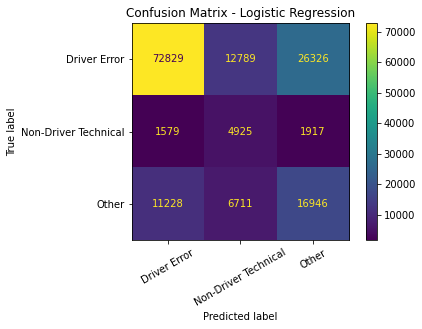

{'Model': 'Logistic Regression',
 'Accuracy': 0.6099838969404187,
 'Macro_F1': 0.48678434614798943}

In [25]:
evaluate("Logistic Regression", logreg_pipe)


### Logistic Regression – Tuned Version (Handling Class Imbalance & Regularization)



Logistic Regression (tuned)
Accuracy: 0.6100
Macro F1 : 0.4868

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.65      0.74    111944
Non-Driver Technical       0.20      0.59      0.30      8421
               Other       0.38      0.49      0.42     34885

            accuracy                           0.61    155250
           macro avg       0.48      0.57      0.49    155250
        weighted avg       0.71      0.61      0.64    155250



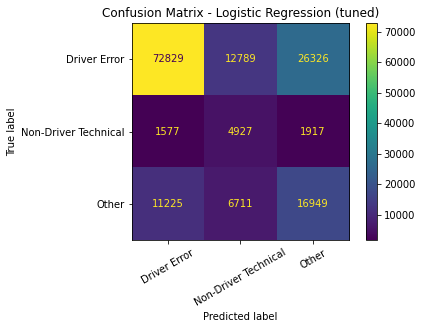

{'Model': 'Logistic Regression (tuned)',
 'Accuracy': 0.6100161030595813,
 'Macro_F1': 0.4868447599891945}

In [32]:
from sklearn.linear_model import LogisticRegression

logreg_pipe_tuned = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        solver="saga",
        penalty="l2",
        C=0.5,
        multi_class="multinomial",
        max_iter=2000,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42
    ))
])

evaluate("Logistic Regression (tuned)", logreg_pipe_tuned)


# Decision Trees

## Decision Tree: Baseline


Decision Tree
Accuracy: 0.7463
Macro F1 : 0.4472

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.77      0.97      0.85    111944
Non-Driver Technical       0.47      0.13      0.21      8421
               Other       0.57      0.18      0.28     34885

            accuracy                           0.75    155250
           macro avg       0.60      0.43      0.45    155250
        weighted avg       0.70      0.75      0.69    155250



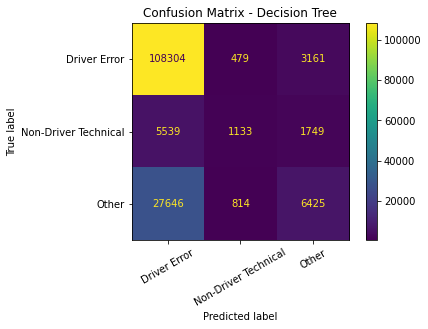

{'Model': 'Decision Tree',
 'Accuracy': 0.7462930756843801,
 'Macro_F1': 0.44720639532426215}

In [26]:
# Evaluate the Decision Tree model
evaluate("Decision Tree", tree_pipe)

### Decision Tree – Pruned and Class-Balanced



Decision Tree (pruned & balanced)
Accuracy: 0.6171
Macro F1 : 0.4873

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.67      0.75    111944
Non-Driver Technical       0.19      0.61      0.29      8421
               Other       0.39      0.46      0.42     34885

            accuracy                           0.62    155250
           macro avg       0.48      0.58      0.49    155250
        weighted avg       0.71      0.62      0.65    155250



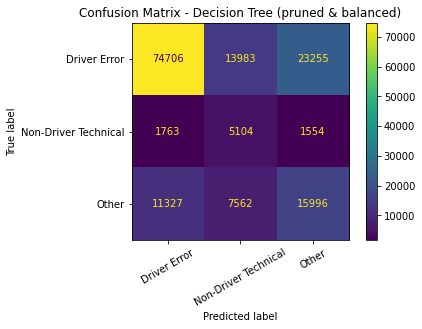

{'Model': 'Decision Tree (pruned & balanced)',
 'Accuracy': 0.6171078904991949,
 'Macro_F1': 0.4872596193184875}

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_pipe_pruned = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=14,              # deep enough to learn interactions
        min_samples_leaf=300,      # strong regularization
        min_samples_split=1000,    # prevents noisy splits
        class_weight="balanced",   # handle remaining imbalance
        random_state=42
    ))
])

evaluate("Decision Tree (pruned & balanced)", tree_pipe_pruned)


# Random Forest

c:\Users\Fred\Conda1\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(



Random Forest
Accuracy: 0.6066
Macro F1 : 0.4692

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.83      0.67      0.74    111944
Non-Driver Technical       0.17      0.62      0.27      8421
               Other       0.39      0.39      0.39     34885

            accuracy                           0.61    155250
           macro avg       0.47      0.56      0.47    155250
        weighted avg       0.70      0.61      0.64    155250



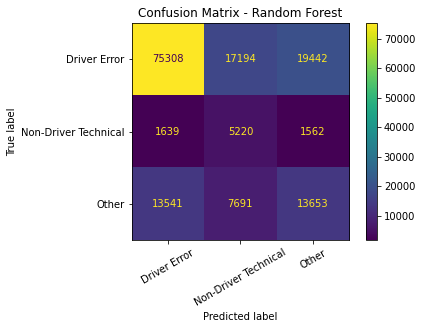

{'Model': 'Random Forest',
 'Accuracy': 0.6066409017713366,
 'Macro_F1': 0.46922439677106587}

In [29]:
# Train and evaluate the Random Forest model
evaluate("Random Forest", rf_pipe)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=50,              # small but effective
        max_depth=15,                # prevents majority domination
        min_samples_leaf=100,        # forces learning from enough data
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ))
])



Random Forest (balanced)
Accuracy: 0.6188
Macro F1 : 0.4871

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.67      0.75    111944
Non-Driver Technical       0.19      0.62      0.29      8421
               Other       0.40      0.45      0.42     34885

            accuracy                           0.62    155250
           macro avg       0.48      0.58      0.49    155250
        weighted avg       0.71      0.62      0.65    155250



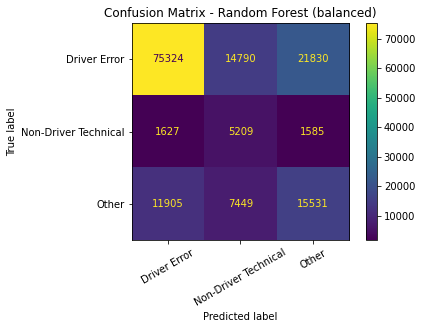

{'Model': 'Random Forest (balanced)',
 'Accuracy': 0.6187697262479871,
 'Macro_F1': 0.48713413914060194}

In [31]:
evaluate("Random Forest (balanced)", rf_pipe)


Random Forest (tuned)
Accuracy: 0.6115
Macro F1 : 0.4849

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.66      0.74    111944
Non-Driver Technical       0.19      0.60      0.29      8421
               Other       0.39      0.47      0.42     34885

            accuracy                           0.61    155250
           macro avg       0.48      0.57      0.48    155250
        weighted avg       0.71      0.61      0.65    155250



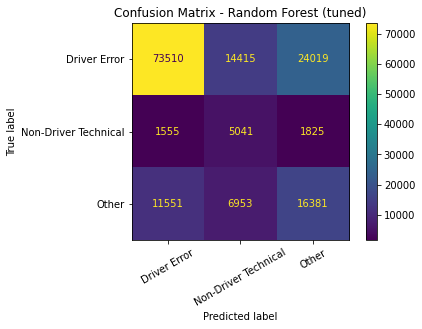

{'Model': 'Random Forest (tuned)',
 'Accuracy': 0.6114782608695652,
 'Macro_F1': 0.4849225892405556}

In [39]:
# --- Tuned Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_pipe_tuned = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,              
        max_depth=10,                  
        min_samples_leaf=100,          
        max_features=0.3,              
        bootstrap=True,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

evaluate("Random Forest (tuned)", rf_pipe_tuned)



Random Forest (tuned)
Accuracy: 0.6044
Macro F1 : 0.4743

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.84      0.66      0.74    111944
Non-Driver Technical       0.18      0.61      0.28      8421
               Other       0.38      0.43      0.40     34885

            accuracy                           0.60    155250
           macro avg       0.47      0.57      0.47    155250
        weighted avg       0.70      0.60      0.64    155250



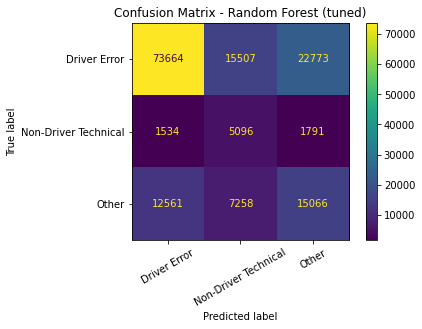

{'Model': 'Random Forest (tuned)',
 'Accuracy': 0.604354267310789,
 'Macro_F1': 0.47434037991055195}

In [41]:
rf_pipe_tuned = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=8,               # shallow on purpose
        min_samples_leaf=200,
        max_features=0.25,         # critical change
        bootstrap=True,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])
evaluate("Random Forest (tuned)", rf_pipe_tuned)

# XGBoost

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_names = le.classes_
class_names

array(['Driver Error', 'Non-Driver Technical', 'Other'], dtype=object)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.25,
    random_state=42,
    stratify=y_encoded
)


In [49]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

xgb_preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_features),
        ("cat", OneHotEncoder(
            handle_unknown="ignore",
            min_frequency=100,
            sparse_output=True
        ), categorical_features)
    ]
)


In [50]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipe = Pipeline(steps=[
    ("preprocess", xgb_preprocessor),
    ("model", XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=50,
        eval_metric="mlogloss",
        tree_method="hist",
        n_jobs=-1,
        random_state=42
    ))
])


XGBoost (baseline)
Accuracy: 0.7606
Macro F1 : 0.5086

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.79      0.95      0.86    111944
Non-Driver Technical       0.54      0.19      0.28      8421
               Other       0.60      0.28      0.38     34885

            accuracy                           0.76    155250
           macro avg       0.64      0.48      0.51    155250
        weighted avg       0.73      0.76      0.72    155250



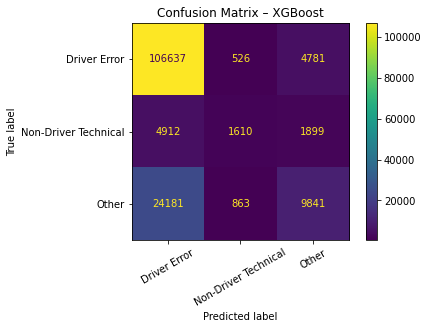

In [55]:
preds = xgb_pipe.fit(X_train, y_train).predict(X_test)

print("XGBoost (baseline)")
print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
print(f"Macro F1 : {f1_score(y_test, preds, average='macro'):.4f}")

print("\nClassification report:")
print(classification_report(
    y_test,
    preds,
    target_names=class_names
))

cm = confusion_matrix(y_test, preds, labels=np.arange(len(class_names)))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(xticks_rotation=30)
plt.title("Confusion Matrix – XGBoost")
plt.show()


In [54]:
# ============================
# XGBOOST: COST-SENSITIVE LEARNING
# ============================
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(
    class_weight="balanced",
    y=y_train
)

xgb_pipe_weighted = Pipeline(steps=[
    ("preprocess", xgb_preprocessor),
    ("model", XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=50,
        eval_metric="mlogloss",
        tree_method="hist",
        n_jobs=-1,
        random_state=42
    ))
])

xgb_pipe_weighted.fit(X_train, y_train, model__sample_weight=sample_weights)

preds = xgb_pipe_weighted.predict(X_test)

print("XGBoost (class-weighted)")
print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
print(f"Macro F1 : {f1_score(y_test, preds, average='macro'):.4f}")
print(classification_report(y_test, preds, target_names=class_names))


XGBoost (class-weighted)
Accuracy: 0.6350
Macro F1 : 0.5066
                      precision    recall  f1-score   support

        Driver Error       0.86      0.68      0.76    111944
Non-Driver Technical       0.20      0.61      0.31      8421
               Other       0.42      0.50      0.45     34885

            accuracy                           0.64    155250
           macro avg       0.49      0.60      0.51    155250
        weighted avg       0.73      0.64      0.67    155250

